### Import libs


In [534]:

import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Library to work with Regular Expressions
import re

# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size 
rcParams['figure.figsize'] = 10,8

### Import Data

In [535]:
# Importing train dataset
df_train = pd.read_csv("train.csv")

# Importing test dataset
df_test = pd.read_csv("test.csv")

### Look at data shape

In [536]:
#Looking data format and types
print(df_train.info())

# printing test info()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

We can see several of the columns have Null values, so we will have to deal with that.

In [537]:
#Some Statistics
df_train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [538]:
#Take a look at the data
print(df_train.head())
#print(df_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Some feature engineering

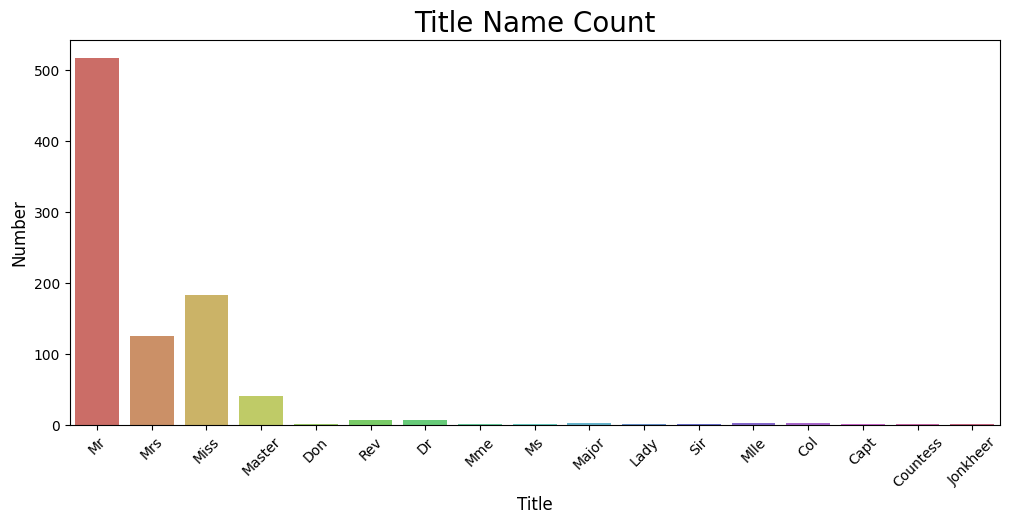

In [539]:
#The passenger names have titles that end in a period.  we can search for the word before the period to split them out
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#Doing the same on df_test
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xlabel("Title", fontsize=12) #seting the xtitle and size
plt.ylabel("Number", fontsize=12) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()



That worked pretty well!  we can throw that in the model, or maybe group these together further to make it simpler

In [540]:
#group together different titles (because 17 is a lot and most don't have many people)
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
#df_train['Title'] = df_train.Title.map(Title_Dictionary)
#df_test['Title'] = df_test.Title.map(Title_Dictionary)

Chances to survive based on titles: 
Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64


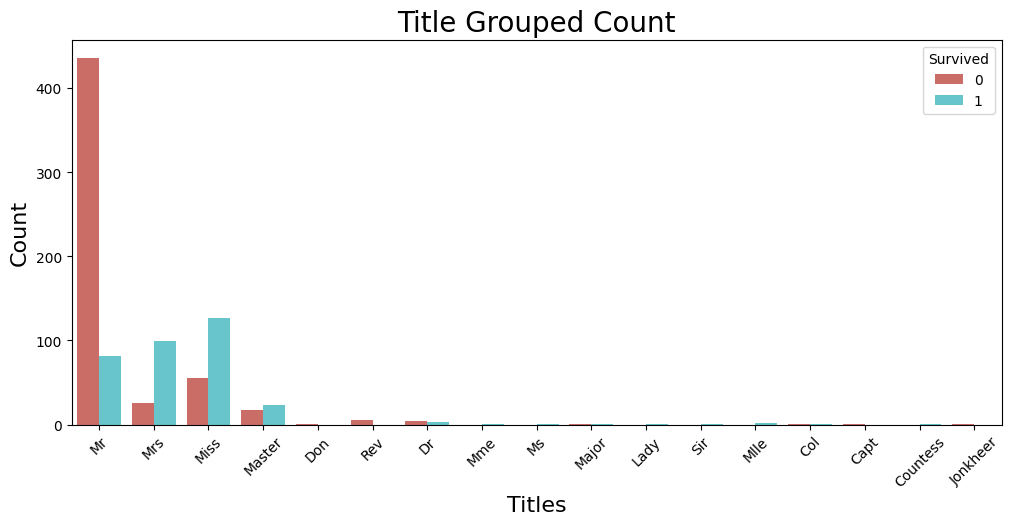

In [541]:
#printing the chance to survive by each title
print("Chances to survive based on titles: ") 
print(df_train.groupby("Title")["Survived"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [542]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

#printing the variabe that we created by median
print(age_group.median())

Sex     Pclass  Title   
female  1       Countess    33.0
                Dr          49.0
                Lady        48.0
                Miss        30.0
                Mlle        24.0
                Mme         24.0
                Mrs         41.5
        2       Miss        24.0
                Mrs         32.0
                Ms          28.0
        3       Miss        18.0
                Mrs         31.0
male    1       Capt        70.0
                Col         58.0
                Don         40.0
                Dr          44.0
                Jonkheer    38.0
                Major       48.5
                Master       4.0
                Mr          40.0
                Sir         49.0
        2       Dr          38.5
                Master       1.0
                Mr          31.0
                Rev         46.5
        3       Master       4.0
                Mr          26.0
Name: Age, dtype: float64


In [543]:
#inputing the values on Age Na's 
# using the groupby to transform this variables
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

df_test.loc[df_train.Age.isnull(), 'Age'] = df_test.groupby(['Sex','Pclass','Title']).Age.transform('median')

# printing the total of nulls in Age Feature
print(df_train["Age"].isnull().sum())

0


Great! we got rid of all the NaNs in the Age column, replacing them with a pretty good guess of what they were

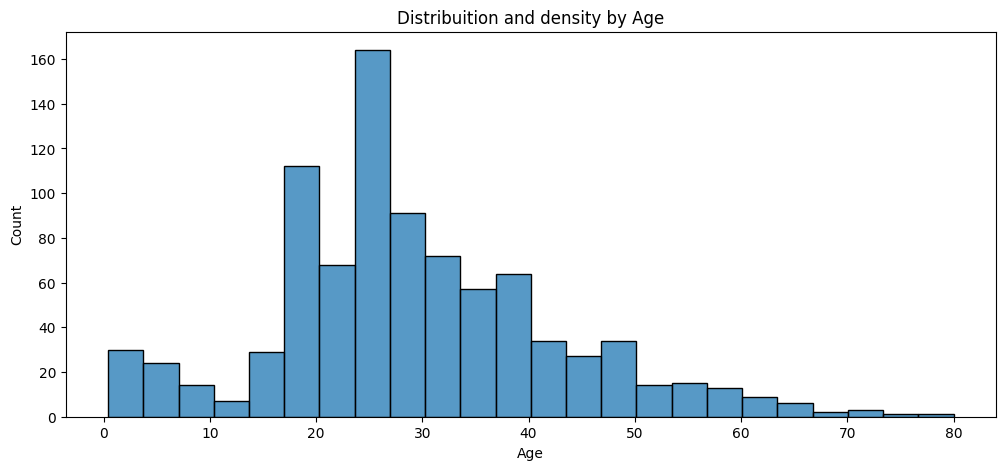

In [544]:
#Let's see the result of the input

#seting the figure size
plt.figure(figsize=(12,5))

#ploting again the Age Distribuition after the transformation in our dataset
sns.histplot(df_train["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

<Figure size 1200x500 with 0 Axes>

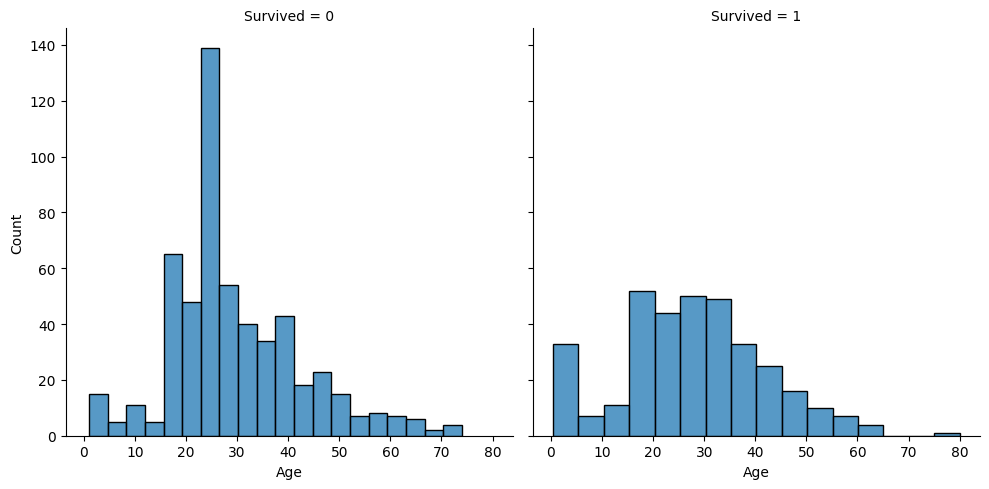

In [545]:
#separate by survivors or not

# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(df_train, col='Survived',height=5)
g = g.map(sns.histplot, "Age")
plt.show()

In [546]:
#making categories to fit ages into.  may not be needed since age is one of our few continuous variables

#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created 
df_train["Age_cat"] = pd.cut(df_train.Age, interval, labels=cats)

# same that we used above in df train
df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

# Printing the new Category
df_train["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): ['babies' < 'Children' < 'Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']

Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


c:\Users\iprosado\My Programs\SQLPathFinder3\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


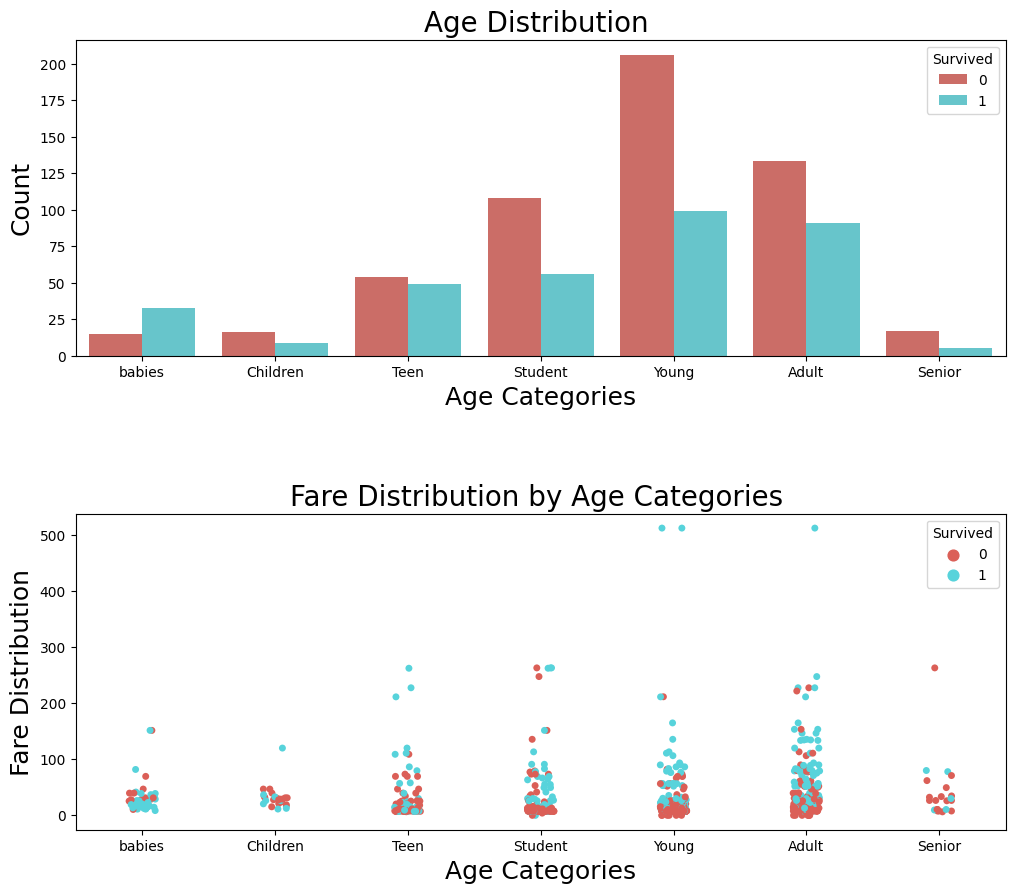

In [547]:
#Describe of categorical Age

# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(df_train.Age_cat, df_train.Survived))

#Seting the figure size
plt.figure(figsize=(12,10))

#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=df_train,hue="Survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categories", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.stripplot(x='Age_cat',y="Fare",data=df_train,
              hue="Survived", palette="hls", )
plt.ylabel("Fare Distribution", fontsize=18)
plt.xlabel("Age Categories", fontsize=18)
plt.title("Fare Distribution by Age Categories ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [548]:
Age_fare = ['Pclass', 'Age_cat'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[Age_fare[0]], df_train[Age_fare[1]], 
            values=df_train['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)

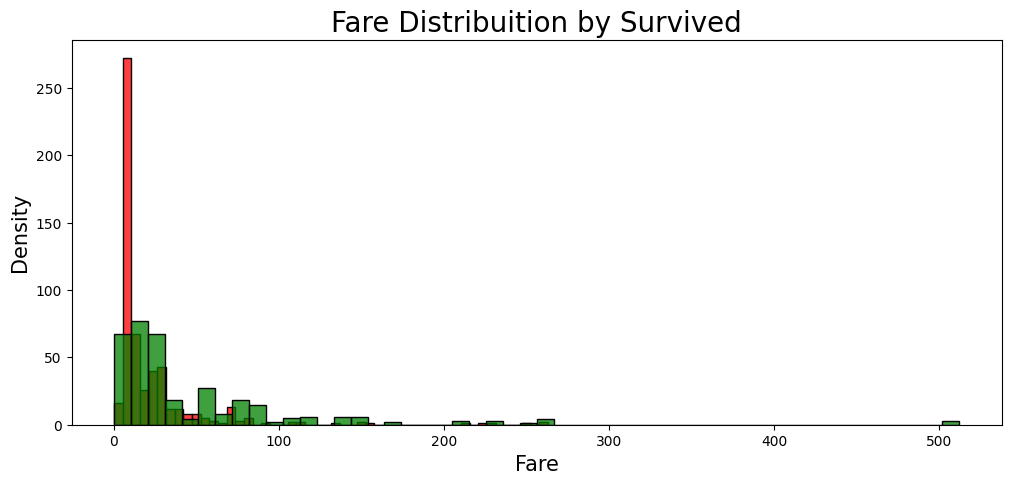

In [549]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.histplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.histplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

Survived    0    1
Fare_cat          
NoInf      14    1
quart_1   175   51
quart_2   155   62
quart_3   112   99
quart_4    93  129


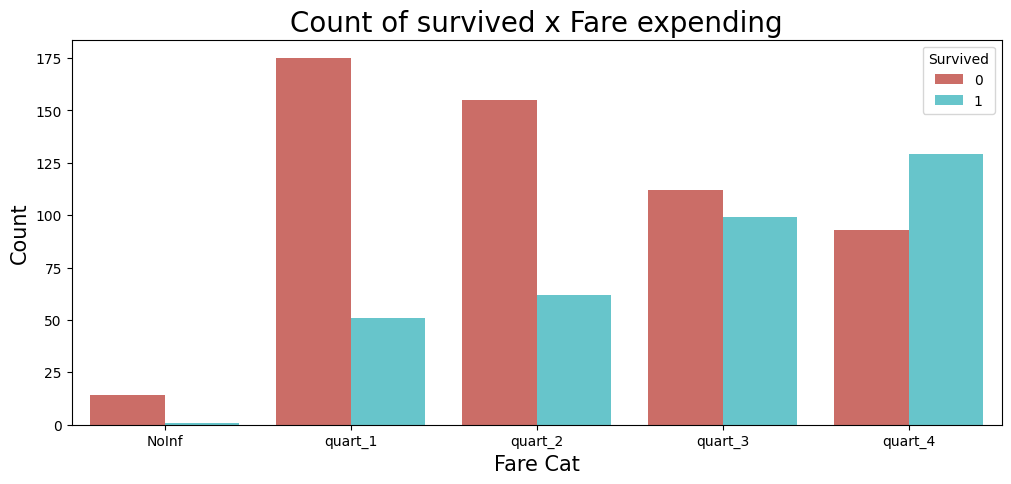

In [550]:
#Filling the NA's with -0.5
df_train.Fare = df_train.Fare.fillna(-0.5)

df_test.Fare = df_test.Fare.fillna(-0.5)

#intervals to categorize
quant = (-1, 0, 8, 15, 31, 600)

#Labels without input values
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

#doing the cut in fare and puting in a new column
df_train["Fare_cat"] = pd.cut(df_train.Fare, quant, labels=label_quants)
df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(df_train.Fare_cat, df_train.Survived))

plt.figure(figsize=(12,5))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=df_train, palette="hls")
plt.title("Count of survived x Fare expending",fontsize=20)
plt.xlabel("Fare Cat",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

In [551]:
#Now lets drop the variable Fare, Age and ticket that is irrelevant now
del df_train["Fare"]
del df_train["Ticket"]
del df_train["Age"]
del df_train["Cabin"]
del df_train["Name"]

#same in df_test
del df_test["Fare"]
del df_test["Ticket"]
del df_test["Age"]
del df_test["Cabin"]
del df_test["Name"]

print(df_train.shape)
print(df_test.shape)

(891, 10)
(418, 9)


In [552]:
#Looking the result of transformations
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_cat,Fare_cat
0,1,0,3,male,1,0,S,Mr,Student,quart_1
1,2,1,1,female,1,0,C,Mrs,Adult,quart_4
2,3,1,3,female,0,0,S,Miss,Young,quart_1
3,4,1,1,female,1,0,S,Mrs,Young,quart_4
4,5,0,3,male,0,0,S,Mr,Young,quart_2


Total of Survived or not: 
Survived
0    549
1    342
Name: PassengerId, dtype: int64


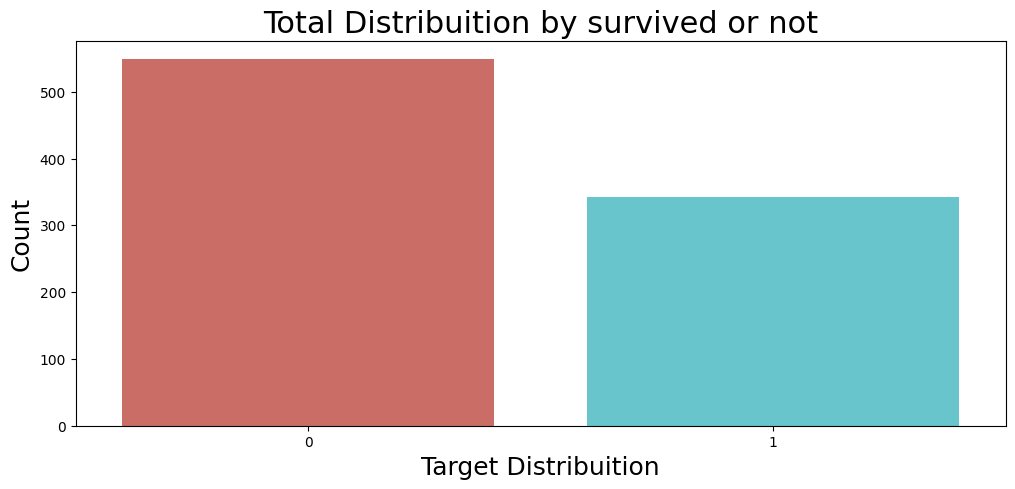

In [553]:
# Let see how many people die or survived
print("Total of Survived or not: ")
print(df_train.groupby("Survived")["PassengerId"].count())

plt.figure(figsize=(12,5))

sns.countplot(x="Survived", data=df_train,palette="hls")
plt.title('Total Distribuition by survived or not', fontsize=22)
plt.xlabel('Target Distribuition', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


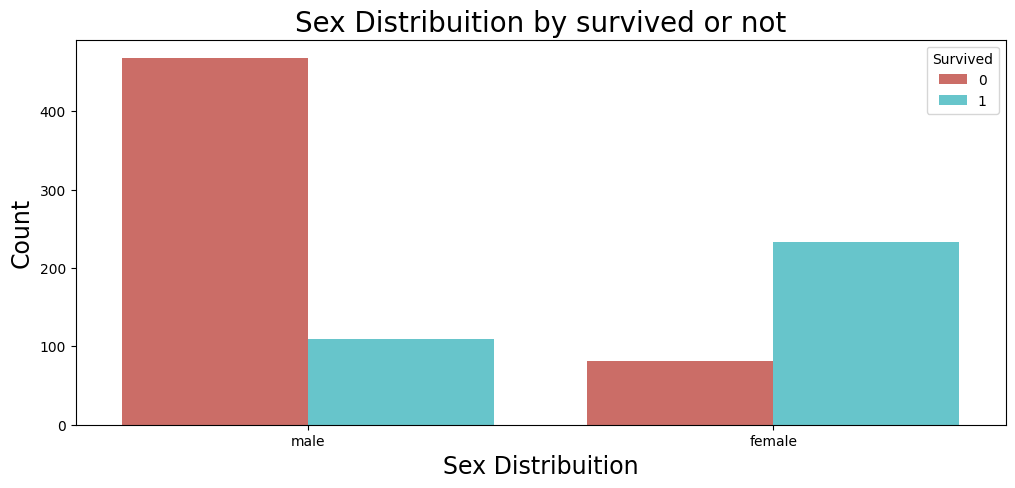

In [554]:
print(pd.crosstab(df_train.Survived, df_train.Sex))

plt.figure(figsize=(12,5))
sns.countplot(x="Sex", data=df_train, hue="Survived",palette="hls")
plt.title('Sex Distribuition by survived or not', fontsize=20)
plt.xlabel('Sex Distribuition',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


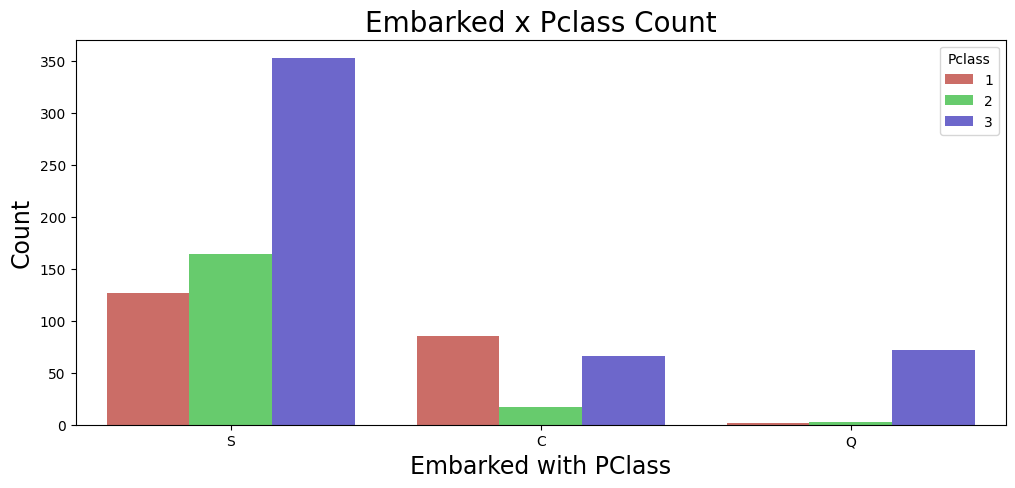

In [555]:
# Distribuition by class
print(pd.crosstab(df_train.Pclass, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Pclass",palette="hls")
plt.title('Embarked x Pclass Count', fontsize=20)
plt.xlabel('Embarked with PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

In [556]:
#lets input the NA's with the highest frequency
df_train["Embarked"] = df_train["Embarked"].fillna('S')
df_test["Embarked"] = df_test["Embarked"].fillna('S')


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


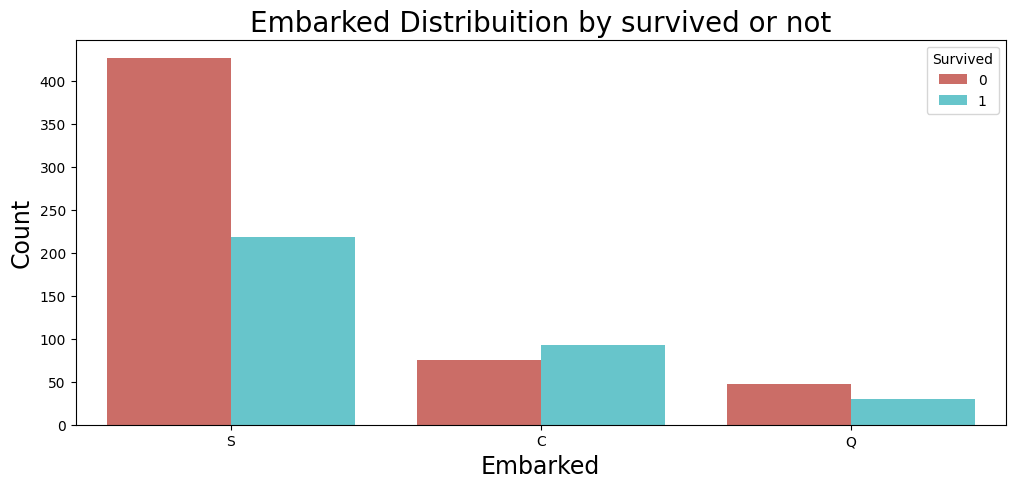

In [557]:
# Exploring Survivors vs Embarked
print(pd.crosstab(df_train.Survived, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Survived",palette="hls")
plt.title('Embarked Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


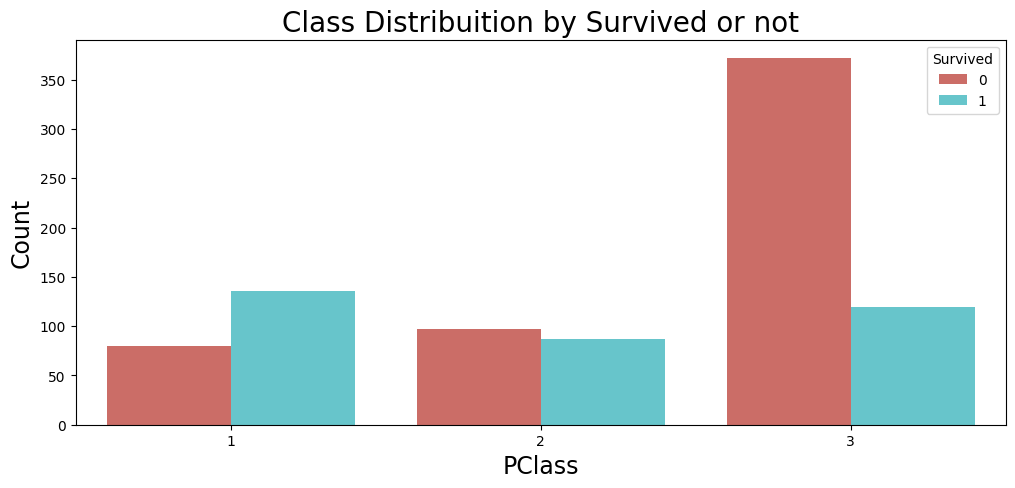

In [558]:
# Exploring Survivors vs Pclass
print(pd.crosstab(df_train.Survived, df_train.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=df_train, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

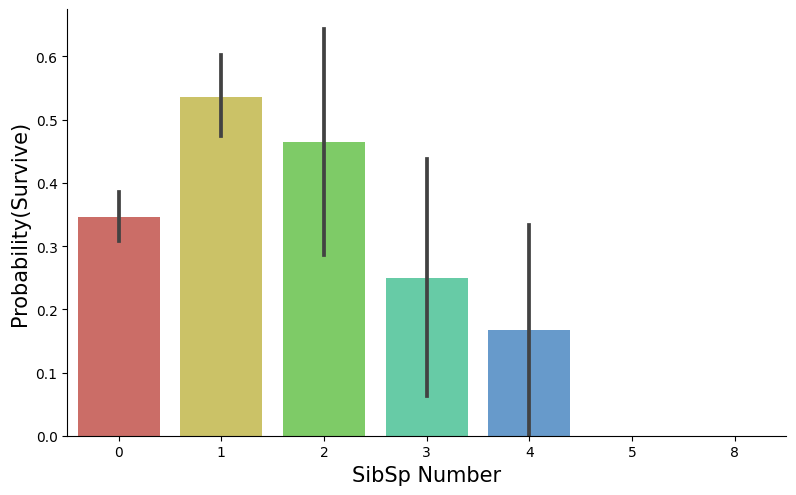

In [559]:
g = sns.catplot(x="SibSp",y="Survived",data=df_train,
                   kind="bar", height = 5, aspect= 1.6, palette = "hls")
g.set_ylabels("Probability(Survive)", fontsize=15)
g.set_xlabels("SibSp Number", fontsize=15)

plt.show()

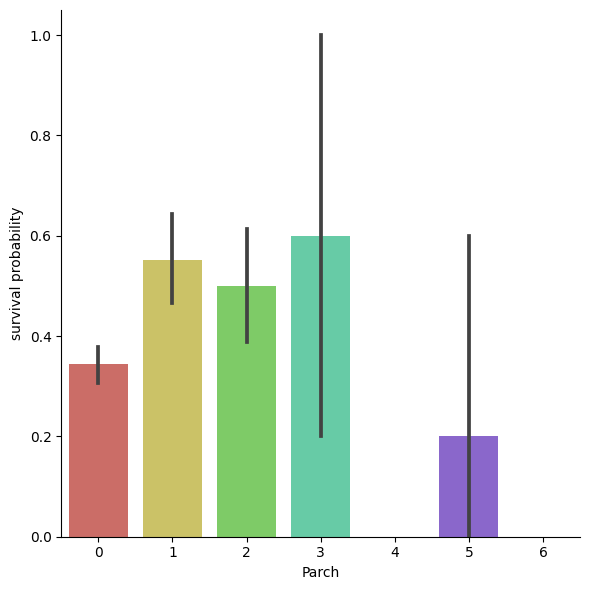

In [560]:
# Explore Parch feature vs Survived
g  = sns.catplot(x="Parch",y="Survived",data=df_train, kind="bar", height = 6,palette = "hls")
g = g.set_ylabels("survival probability")

In [561]:
#Create a new column and sum the Parch + SibSp + 1 that refers the people self
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

Survived    0    1
FSize             
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0


c:\Users\iprosado\My Programs\SQLPathFinder3\python3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


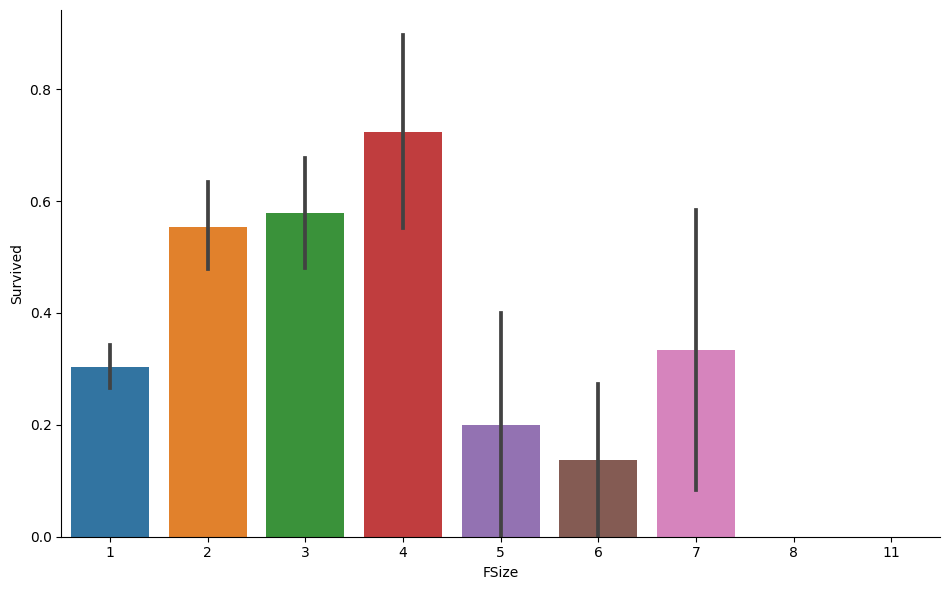

In [562]:
print(pd.crosstab(df_train.FSize, df_train.Survived))
sns.catplot(x="FSize",y="Survived", data=df_train, kind="bar",size=6, aspect=1.6)
plt.show()

In [563]:
del df_train["SibSp"]
del df_train["Parch"]

del df_test["SibSp"]
del df_test["Parch"]


print(df_train.shape)
print(df_test.shape)

print(df_train.head())
print(df_test.head())

(891, 9)
(418, 8)
   PassengerId  Survived  Pclass     Sex Embarked Title  Age_cat Fare_cat  \
0            1         0       3    male        S    Mr  Student  quart_1   
1            2         1       1  female        C   Mrs    Adult  quart_4   
2            3         1       3  female        S  Miss    Young  quart_1   
3            4         1       1  female        S   Mrs    Young  quart_4   
4            5         0       3    male        S    Mr    Young  quart_2   

   FSize  
0      2  
1      2  
2      1  
3      2  
4      1  
   PassengerId  Pclass     Sex Embarked Title  Age_cat Fare_cat  FSize
0          892       3    male        Q    Mr    Young  quart_1      1
1          893       3  female        S   Mrs    Adult  quart_1      2
2          894       2    male        Q    Mr   Senior  quart_2      1
3          895       3    male        S    Mr    Young  quart_2      1
4          896       3  female        S   Mrs  Student  quart_2      3


In [564]:
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

# Get missing columns in the training test
missing_cols = set( df_train.columns ) - set( df_test.columns ) 
# missing_cols.remove('Survived')
# print (missing_cols)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
df_test = df_test[df_train.columns]

df_test = df_test.drop('Survived', axis = 1)

print(df_train.shape)
print(df_test.shape)

df_train.to_csv('train_column_match.csv')
df_test.to_csv('test_column_match.csv')

(891, 33)
(418, 32)


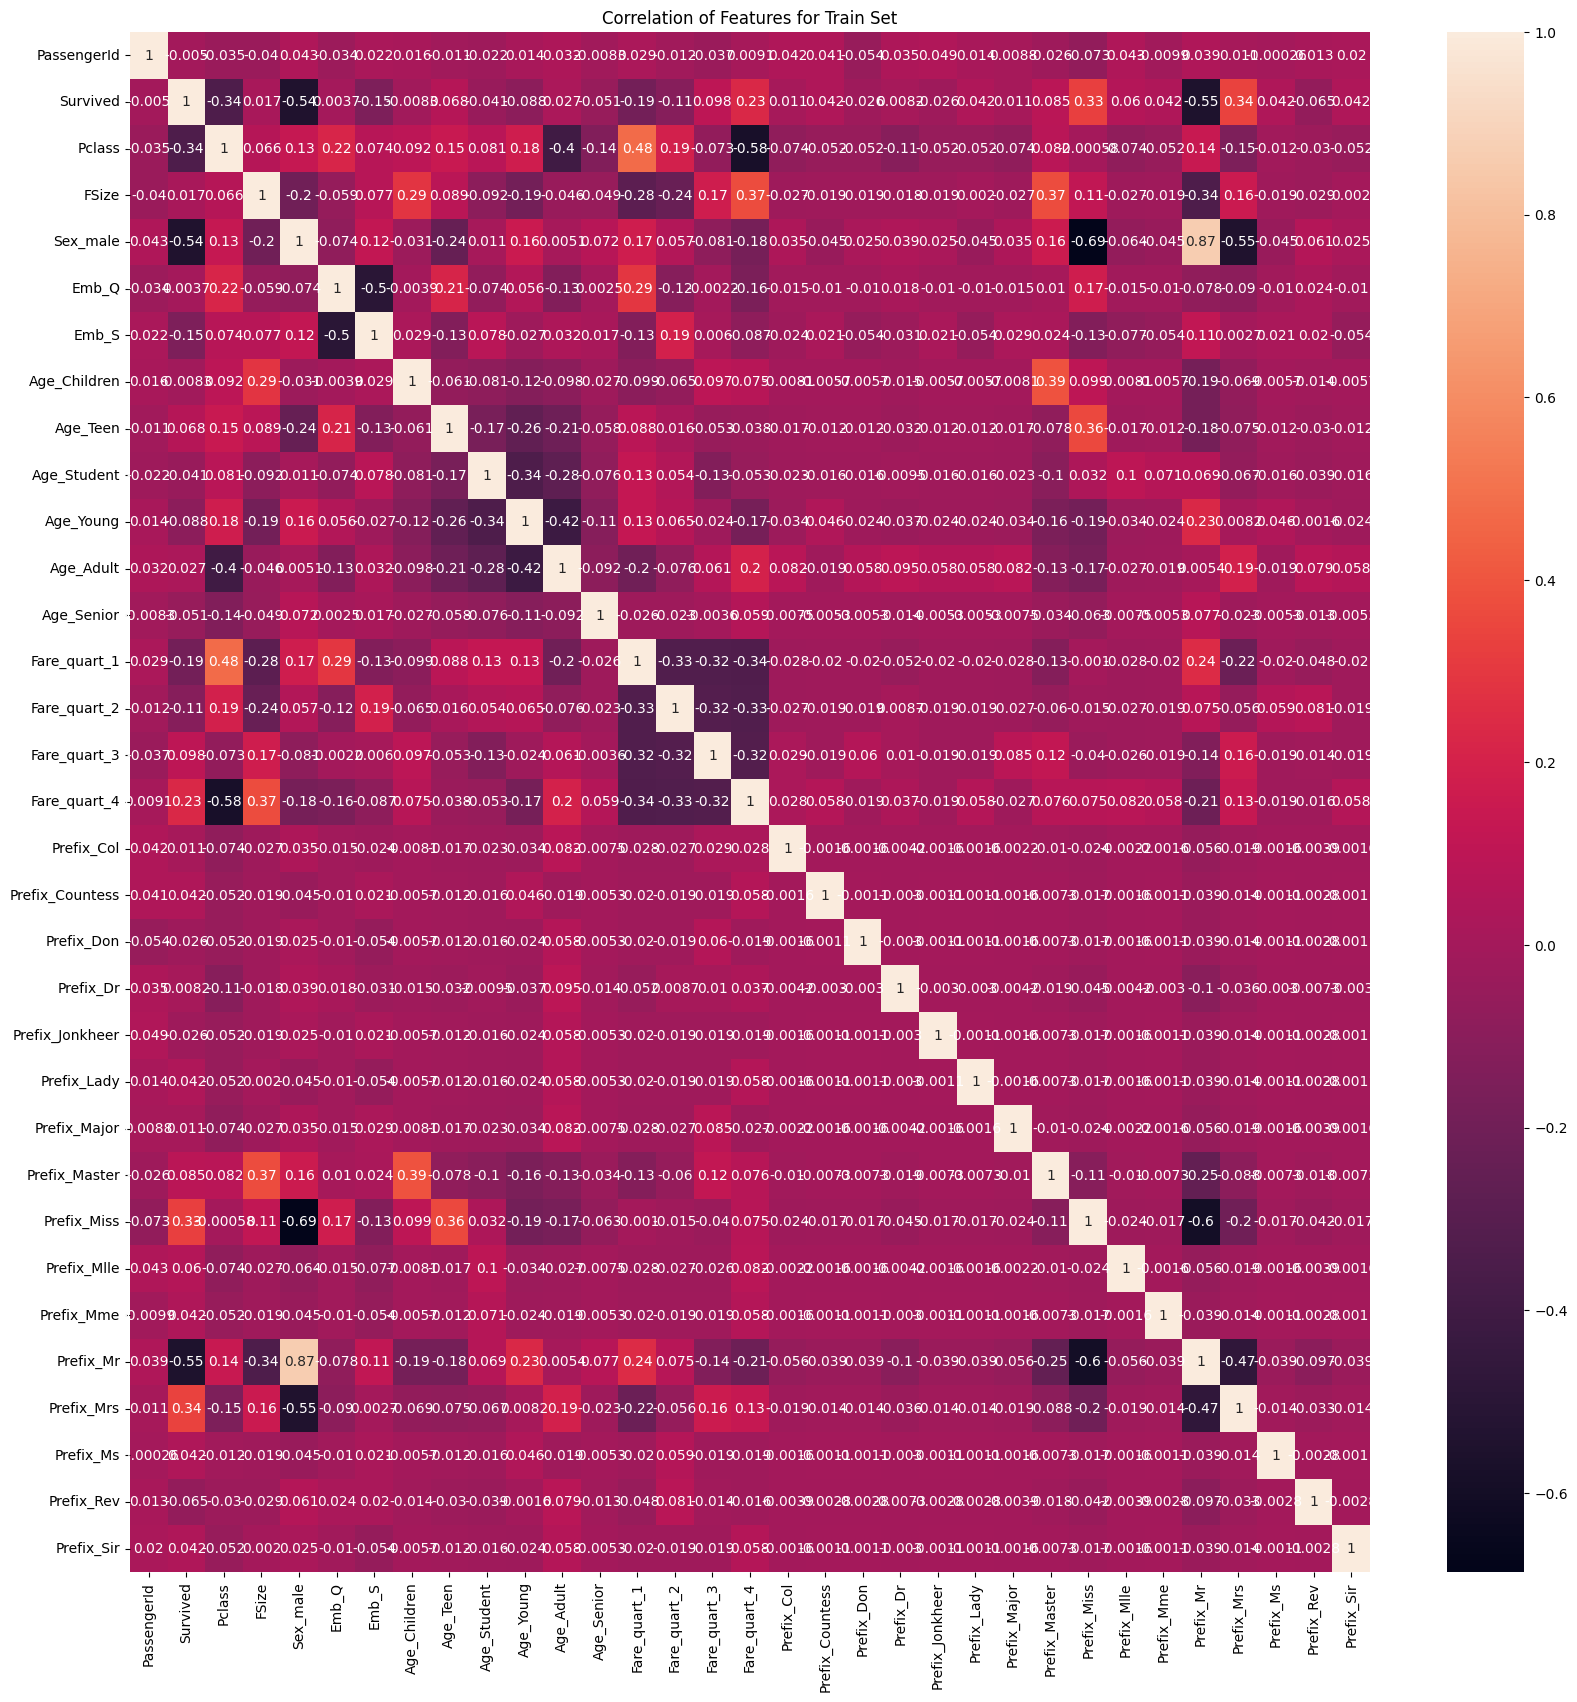

In [565]:
#Finally, lets look the correlation of df_train
#this was more useful when we only had a few features - I've expanded it so it's hard to read
plt.figure(figsize=(20,20))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

## Shuffle the data

In [566]:

shuffled_indices = np.random.RandomState(seed=11).permutation(df_train.index)
df_train = df_train.reindex(shuffled_indices)


df_train.head()

,PassengerId,Survived,Pclass,FSize,Sex_male,Emb_Q,Emb_S,Age_Children,Age_Teen,Age_Student,...,Prefix_Major,Prefix_Master,Prefix_Miss,Prefix_Mlle,Prefix_Mme,Prefix_Mr,Prefix_Mrs,Prefix_Ms,Prefix_Rev,Prefix_Sir
431,432,1,3,2,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
821,822,1,3,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
629,630,0,3,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
626,627,0,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
665,666,0,2,3,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Split out the targets from the training data and remove passenger ID from both

In [567]:
train = df_train.drop(["Survived","PassengerId"],axis=1)
train_ = df_train["Survived"]

test_ = df_test.drop(["PassengerId"],axis=1)

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float64, copy=False)

print(X_train.shape[1])
print(X_test.shape[1])


31
31


### Standardize the data

In [568]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)


#create a layer that will fit on our model
normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

### Modeling

In [569]:
from keras.layers import  Dropout
from keras.optimizers import SGD

In [570]:
# Set the input and output sizes
num_inputs = X_train.shape[1]
input_size = num_inputs
output_size = 1
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 500

# define how the model will look like
model = tf.keras.Sequential([
    normalize,
    tf.keras.layers.Dense(18, activation='relu',  input_dim=input_size, kernel_initializer='uniform'), # 1st hidden layer
    Dropout(0.50),
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    Dropout(0.50),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    Dropout(0.50),
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='sigmoid', kernel_initializer='uniform') # output layer
])

model.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 31)               63        
 n)                                                              
                                                                 
 dense_40 (Dense)            (None, 18)                576       
                                                                 
 dropout_26 (Dropout)        (None, 18)                0         
                                                                 
 dense_41 (Dense)            (None, 500)               9500      
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_42 (Dense)            (None, 500)               250500    
                                                     

In [571]:
#Creating an Stochastic Gradient Descent
sgd = SGD(lr = 0.01, momentum = 0.9)

# Compiling our model
#model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)


# Fitting the ANN to the Training set
model.fit(X_train, y_train, 
            batch_size = 60, 
            epochs = 100,
            validation_split = 0.2,
            callbacks=[early_stopping], # early stopping
            verbose=2)

Epoch 1/100


c:\Users\iprosado\My Programs\SQLPathFinder3\python3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


12/12 - 0s - loss: 0.7114 - accuracy: 0.5885 - val_loss: 0.7054 - val_accuracy: 0.6201 - 442ms/epoch - 37ms/step
Epoch 2/100
12/12 - 0s - loss: 0.6878 - accuracy: 0.5969 - val_loss: 0.6901 - val_accuracy: 0.6201 - 66ms/epoch - 6ms/step
Epoch 3/100
12/12 - 0s - loss: 0.6760 - accuracy: 0.6250 - val_loss: 0.6810 - val_accuracy: 0.6145 - 62ms/epoch - 5ms/step
Epoch 4/100
12/12 - 0s - loss: 0.6515 - accuracy: 0.6433 - val_loss: 0.6617 - val_accuracy: 0.6257 - 64ms/epoch - 5ms/step
Epoch 5/100
12/12 - 0s - loss: 0.6190 - accuracy: 0.7135 - val_loss: 0.6355 - val_accuracy: 0.7654 - 62ms/epoch - 5ms/step
Epoch 6/100
12/12 - 0s - loss: 0.5602 - accuracy: 0.7500 - val_loss: 0.6089 - val_accuracy: 0.7654 - 60ms/epoch - 5ms/step
Epoch 7/100
12/12 - 0s - loss: 0.5257 - accuracy: 0.7612 - val_loss: 0.5940 - val_accuracy: 0.7765 - 61ms/epoch - 5ms/step
Epoch 8/100
12/12 - 0s - loss: 0.5173 - accuracy: 0.7753 - val_loss: 0.6096 - val_accuracy: 0.7709 - 58ms/epoch - 5ms/step
Epoch 9/100
12/12 - 0s - l

In [572]:
y_preds = model.predict(X_test)

submission = pd.read_csv("gender_submission.csv", index_col='PassengerId')
submission['Survived'] = y_preds.astype(int)
submission.to_csv('Titanic_NN.csv')

14/14 [==============================] - 0s 1ms/step


In [573]:
scores = model.evaluate(X_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

30/30 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7935
accuracy: 79.35%


In [574]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.20, 
                    epochs=180, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

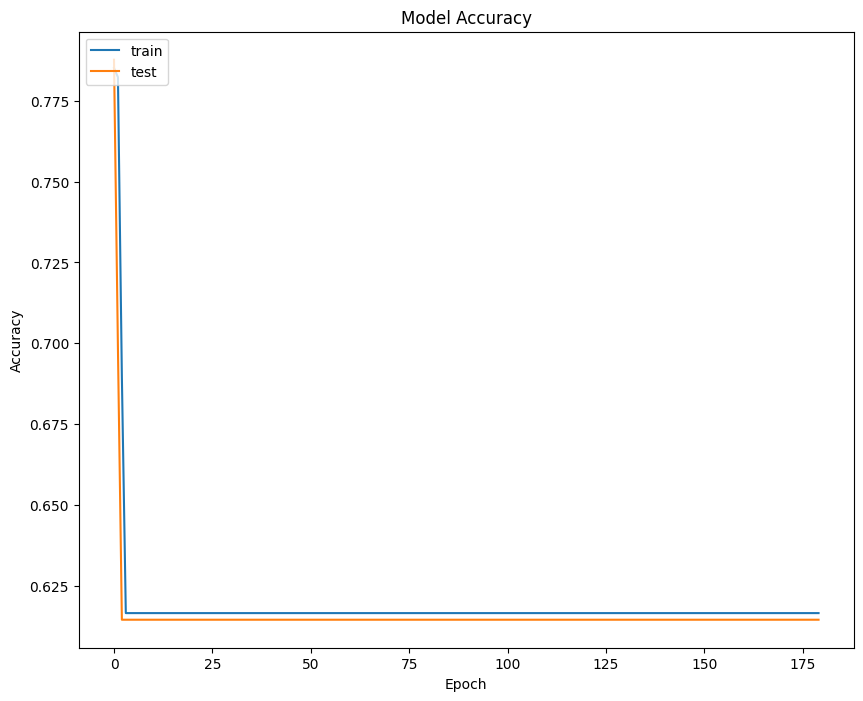

In [ ]:
# summarizing historical accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

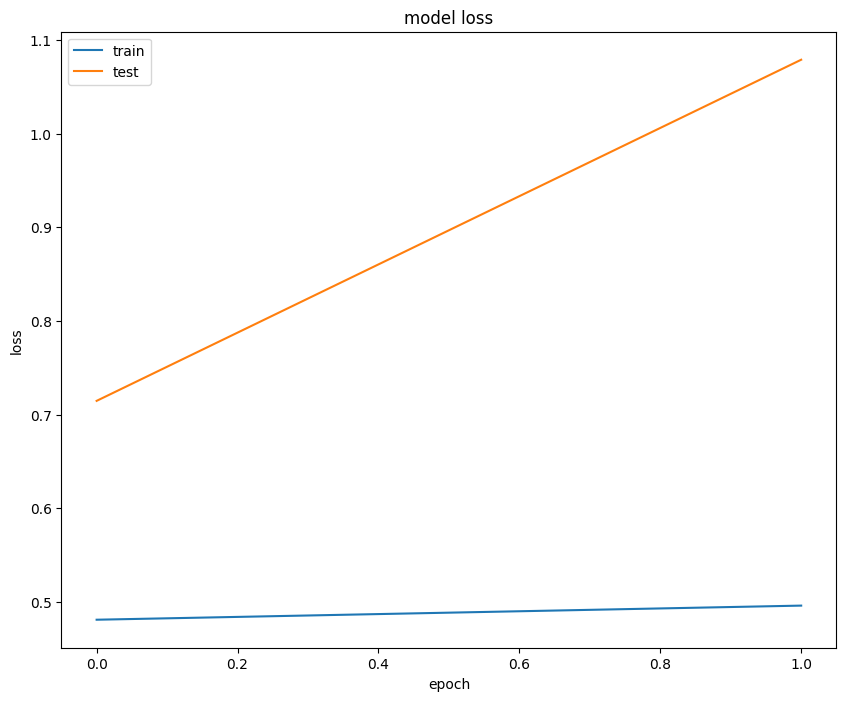

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()